1.LOADING AND INSPECTING DATA

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
import seaborn as sns
# Load the dataset
df = pd.read_csv("flood.csv")




C:\Users\san\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (50000, 21)


In [3]:
#Diplay first 5 rows of the DataFrame
print(df.head())

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

In [4]:
#Display list of all columns in the dataframe
print(df.columns)

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


In [5]:
#Display the data type of each column in the DataFrame
print(df.dtypes)

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object


In [6]:
# Get descriptive statistics and transpose the result
descriptive_stats_transposed = df.describe().T

# Print the transposed descriptive statistics for readability
print(descriptive_stats_transposed)

                                   count     mean       std    min    25%  \
MonsoonIntensity                 50000.0  4.99148  2.236834  0.000  3.000   
TopographyDrainage               50000.0  4.98410  2.246488  0.000  3.000   
RiverManagement                  50000.0  5.01594  2.231310  0.000  3.000   
Deforestation                    50000.0  5.00848  2.222743  0.000  3.000   
Urbanization                     50000.0  4.98906  2.243159  0.000  3.000   
ClimateChange                    50000.0  4.98834  2.226761  0.000  3.000   
DamsQuality                      50000.0  5.01536  2.245000  0.000  3.000   
Siltation                        50000.0  4.98860  2.232642  0.000  3.000   
AgriculturalPractices            50000.0  5.00612  2.234588  0.000  3.000   
Encroachments                    50000.0  5.00638  2.241633  0.000  3.000   
IneffectiveDisasterPreparedness  50000.0  5.00502  2.226076  0.000  3.000   
DrainageSystems                  50000.0  5.00606  2.238107  0.000  3.000   

In [7]:
# Check for missing values in the entire DataFrame
print("Missing Values:\n", df.isnull().sum())


# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())



Missing Values:
 MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Number of Duplicate Rows: 0


In [8]:
# Get information about data types again to ensure everything is as expected
df.info()

# Examine unique values in categorical-like integer columns to check for inconsistencies
for col in df.columns[:-1]: # Exclude the target variable 'FloodProbability'
    if df[col].dtype == 'int64':
        print(f"\nUnique values in '{col}': {df[col].unique()}")
        print(f"Value Counts in '{col}':\n{df[col].value_counts().sort_index()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

2. EXPLORATORY DATA ANALYSIS

In [9]:
# Set the target column name
target_column = 'FloodProbability'

In [10]:
# Get unique values of FloodProbability
print(df['FloodProbability'].unique())



[0.45  0.475 0.515 0.52  0.47  0.57  0.585 0.58  0.555 0.455 0.525 0.48
 0.44  0.465 0.53  0.485 0.55  0.605 0.495 0.445 0.545 0.575 0.43  0.565
 0.56  0.505 0.635 0.425 0.595 0.46  0.61  0.5   0.42  0.51  0.54  0.355
 0.62  0.415 0.59  0.6   0.49  0.615 0.535 0.435 0.405 0.41  0.38  0.385
 0.4   0.395 0.675 0.39  0.625 0.34  0.37  0.63  0.365 0.66  0.68  0.36
 0.64  0.375 0.665 0.345 0.65  0.35  0.645 0.67  0.655 0.32  0.71  0.69
 0.705 0.335 0.7   0.315 0.325 0.685 0.695 0.715 0.33  0.285 0.725]


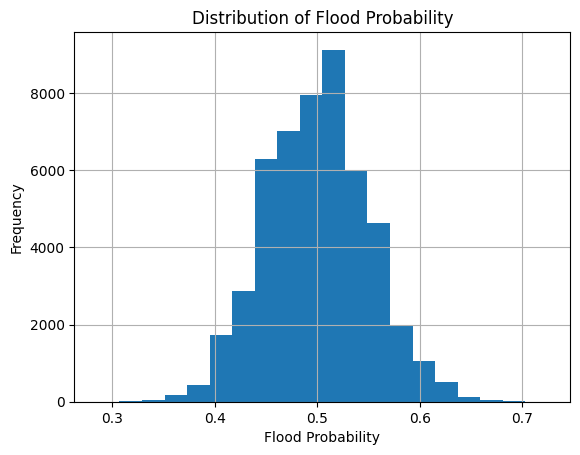

In [11]:
# Visualize the distribution of FloodProbability
import matplotlib.pyplot as plt
df['FloodProbability'].hist(bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

In [12]:
#Target variable statistics
print(df[target_column].describe())

count    50000.000000
mean         0.499660
std          0.050034
min          0.285000
25%          0.465000
50%          0.500000
75%          0.535000
max          0.725000
Name: FloodProbability, dtype: float64


In [13]:
# Check for class imbalance if target column exists
if target_column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_column, data=df)
    plt.title('Class Distribution of Flood Occurrences')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('class_distribution.png')
    plt.close()
    
    # Calculate class imbalance
    class_counts = df[target_column].value_counts()
    print("\nClass Distribution:")
    print(class_counts)
    print(f"Class Imbalance Ratio: {class_counts.max() / class_counts.min():.2f}")


Class Distribution:
FloodProbability
0.500    2018
0.490    1984
0.495    1975
0.485    1960
0.505    1945
         ... 
0.710       1
0.700       1
0.715       1
0.285       1
0.725       1
Name: count, Length: 83, dtype: int64
Class Imbalance Ratio: 2018.00


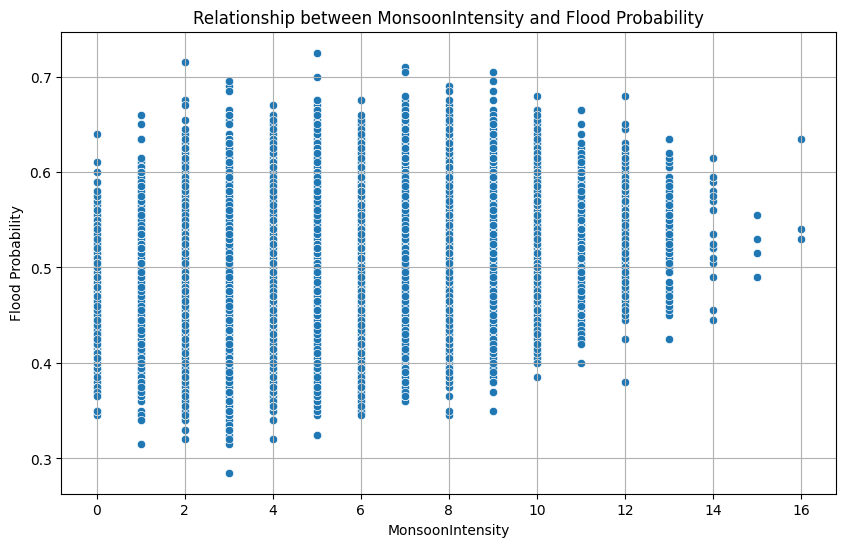

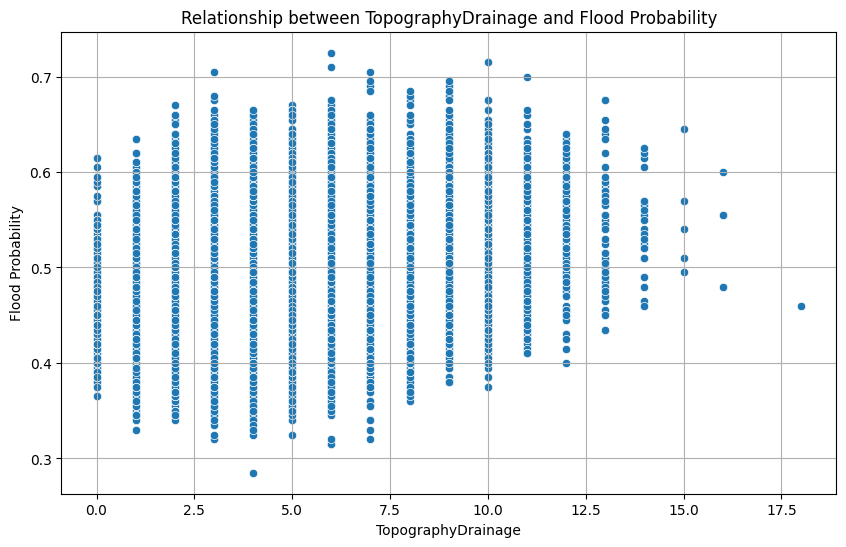

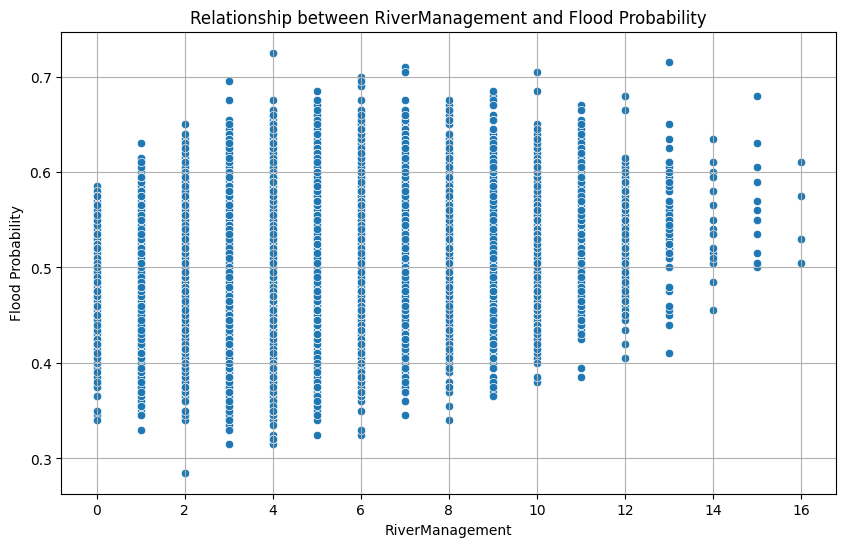

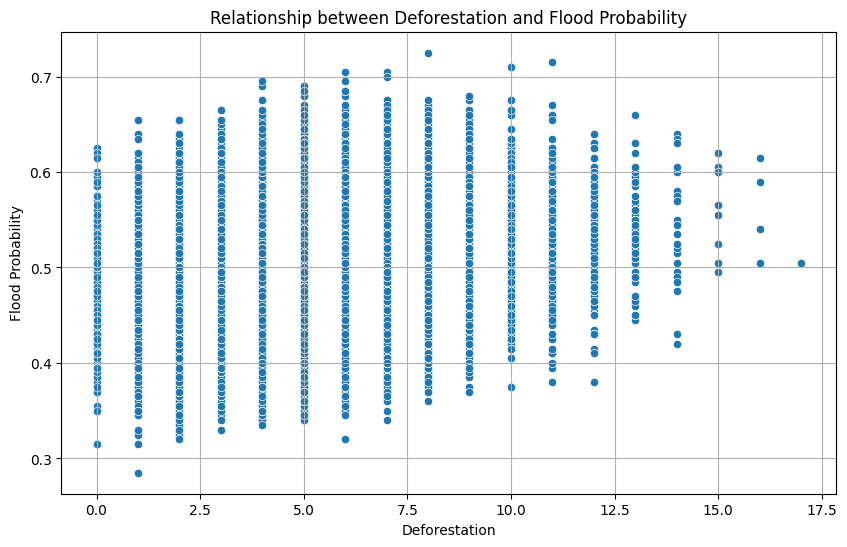

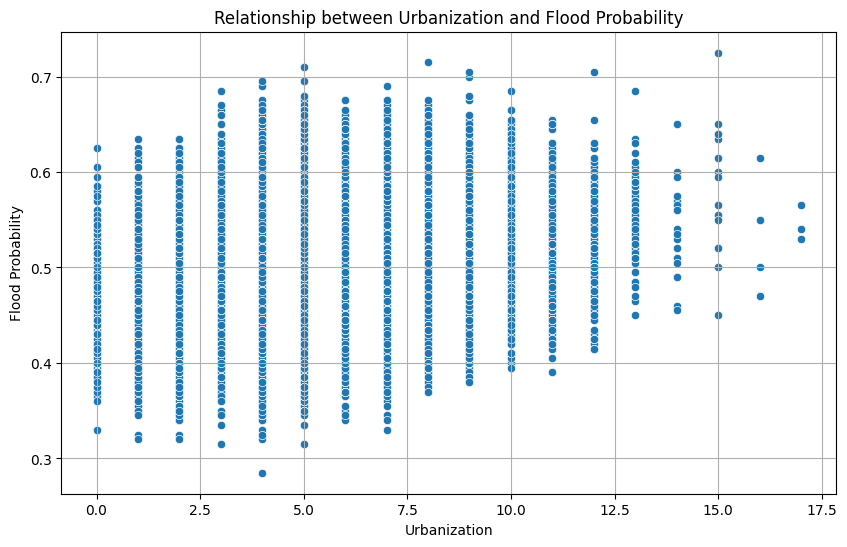

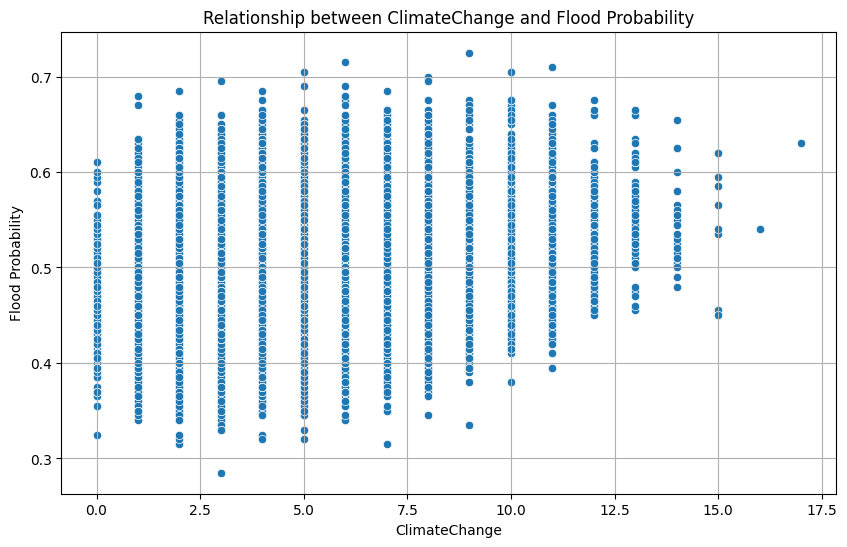

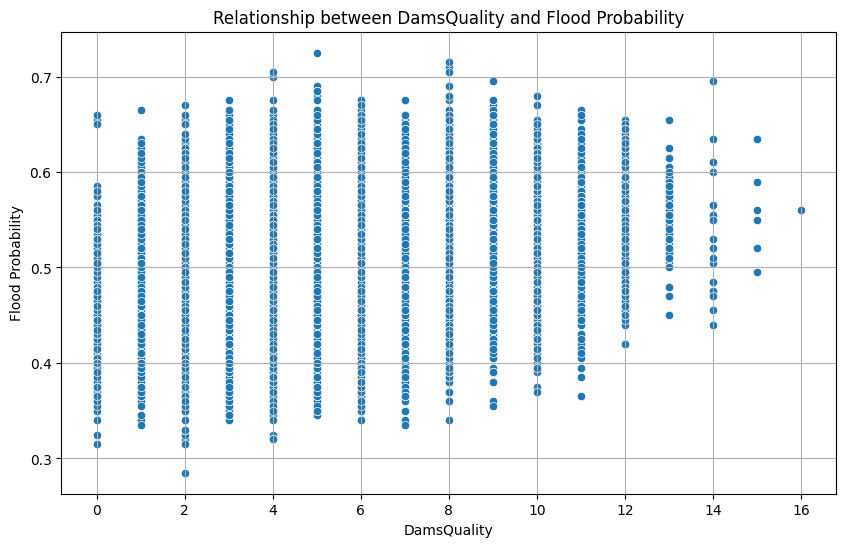

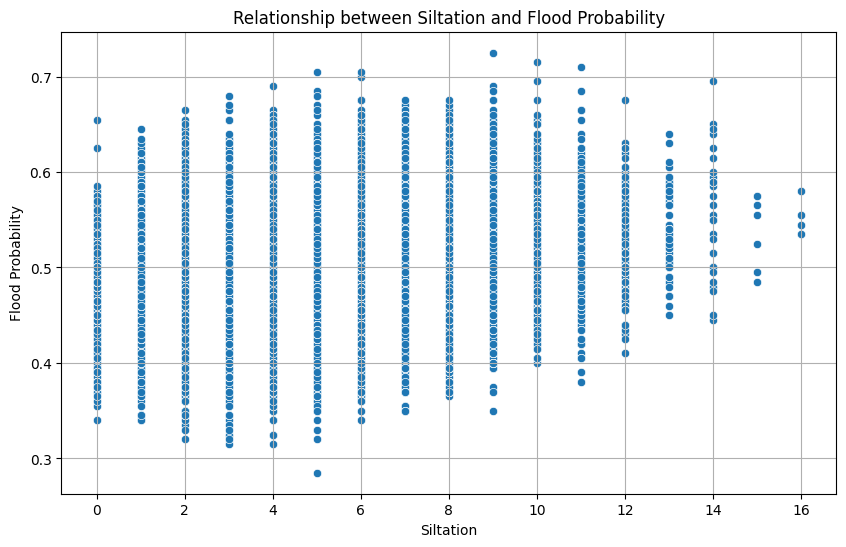

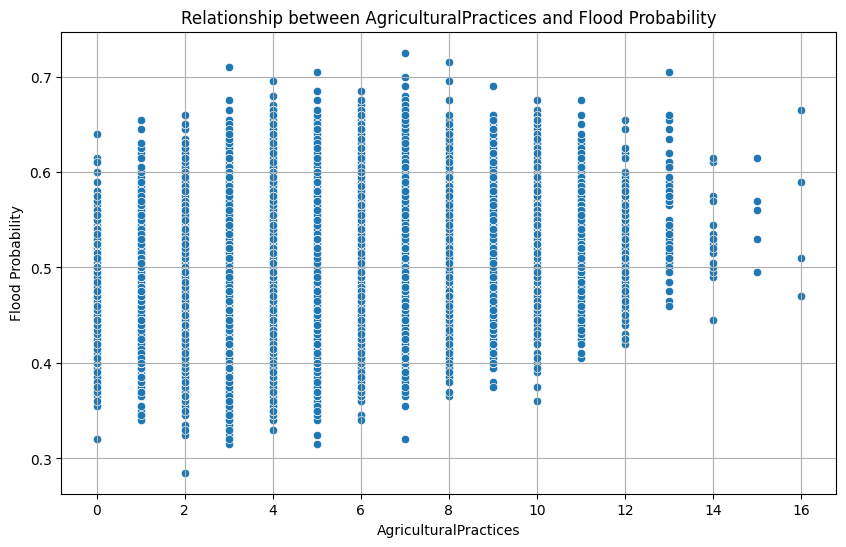

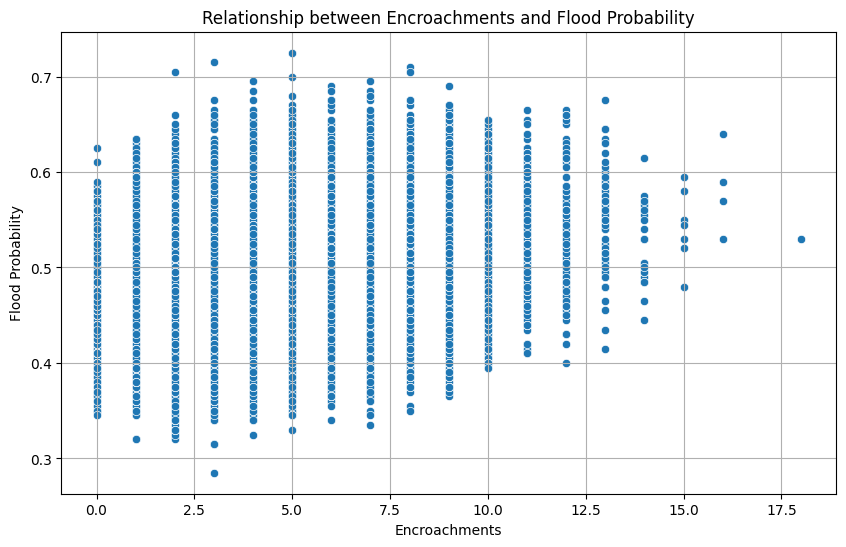

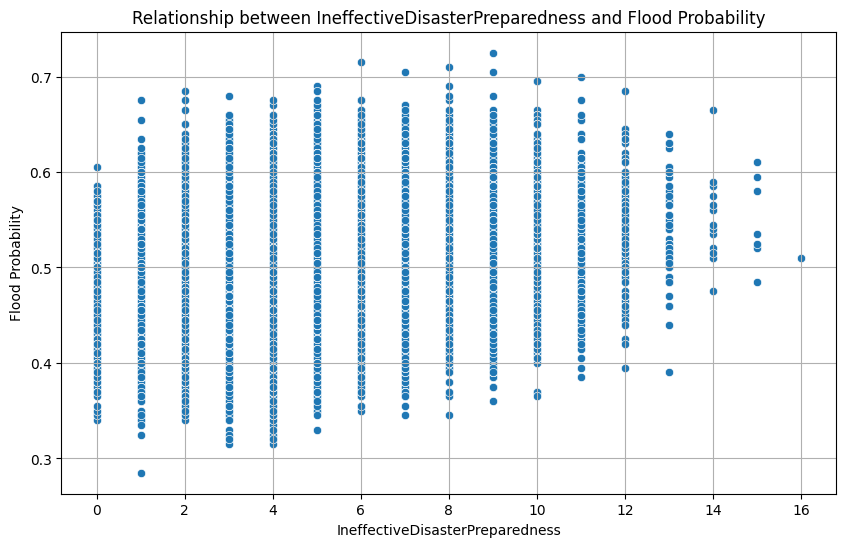

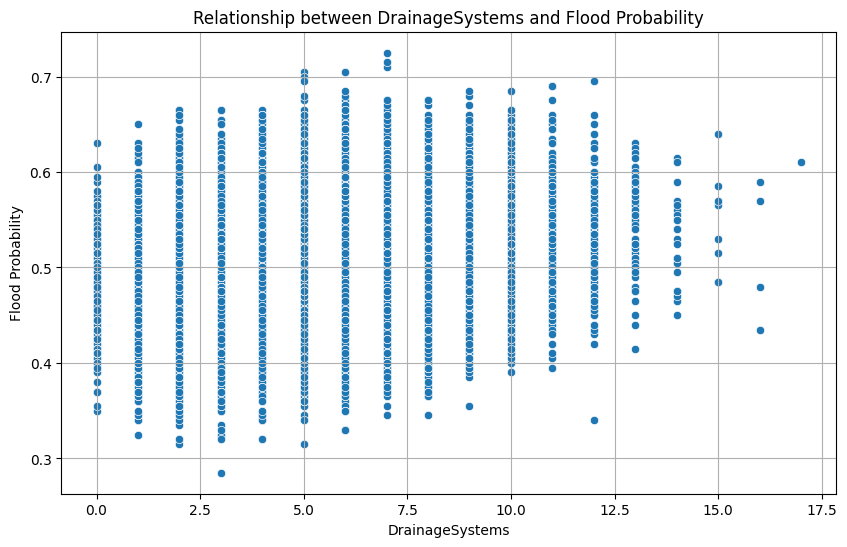

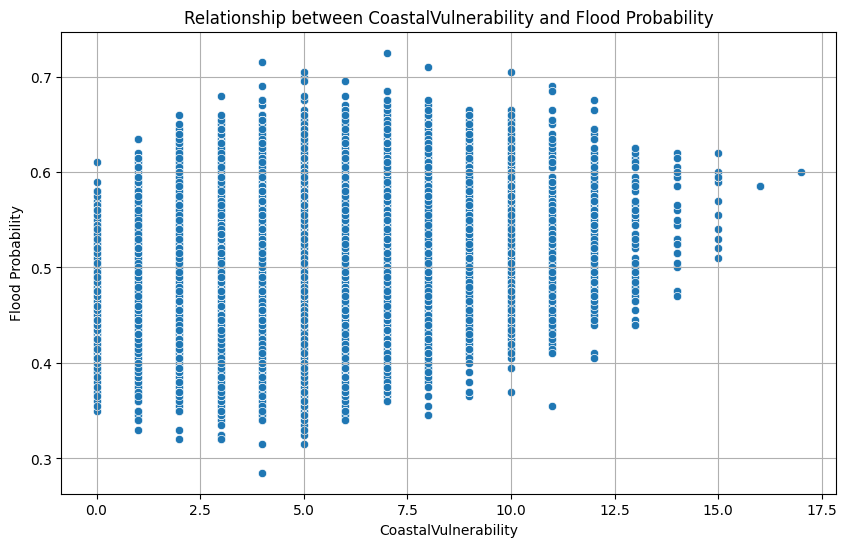

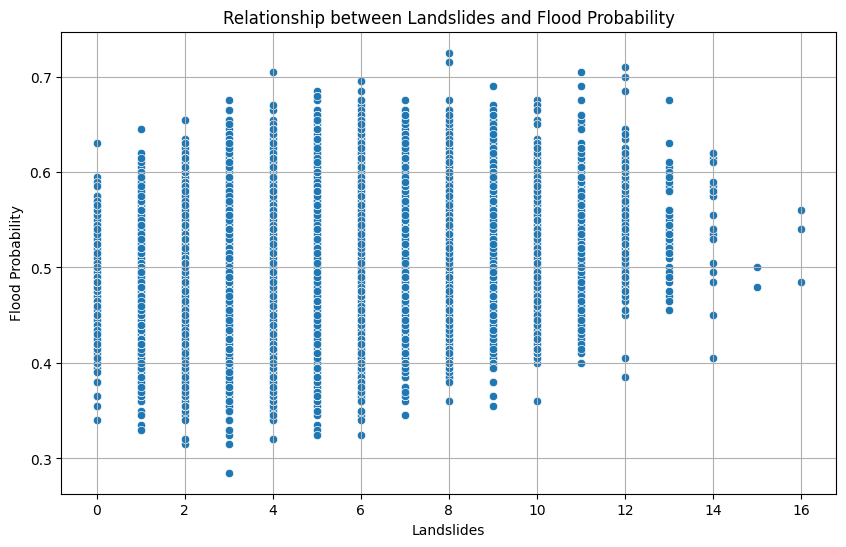

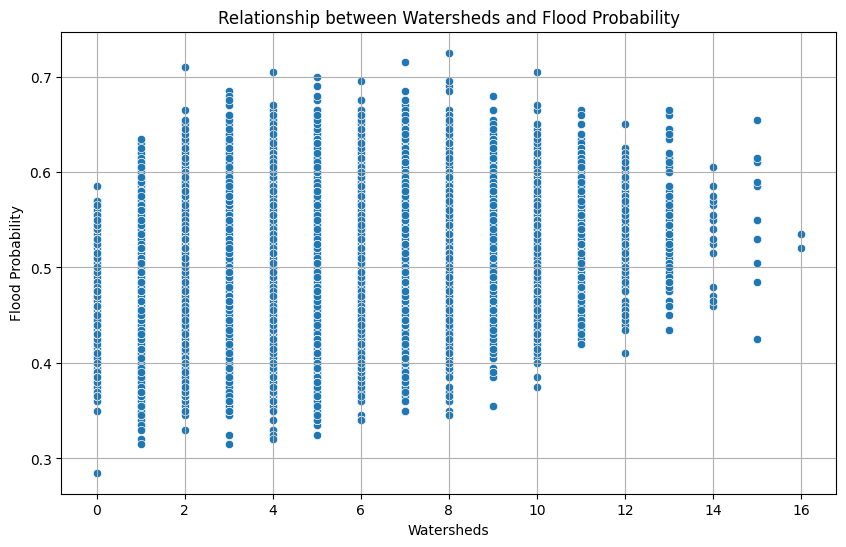

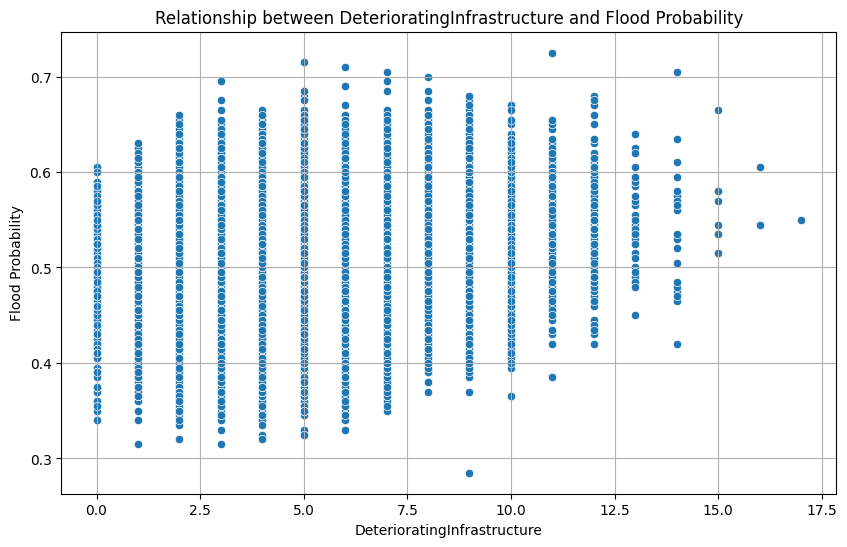

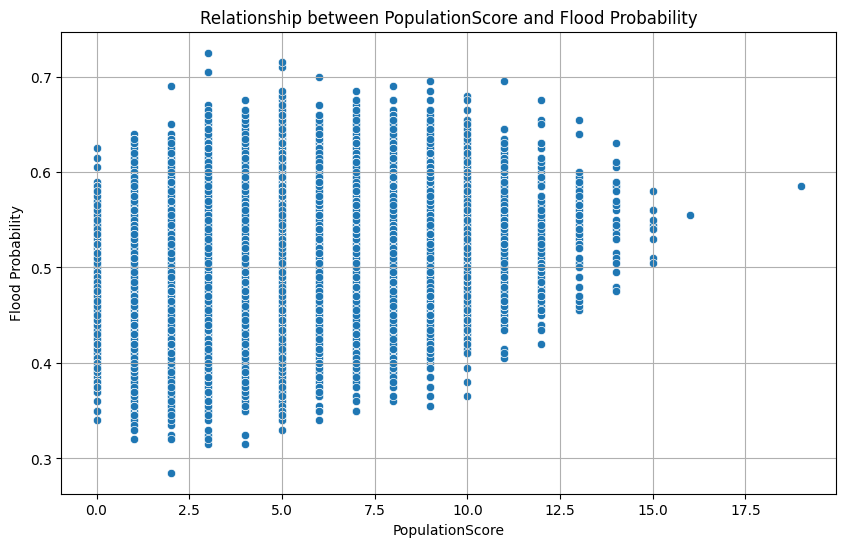

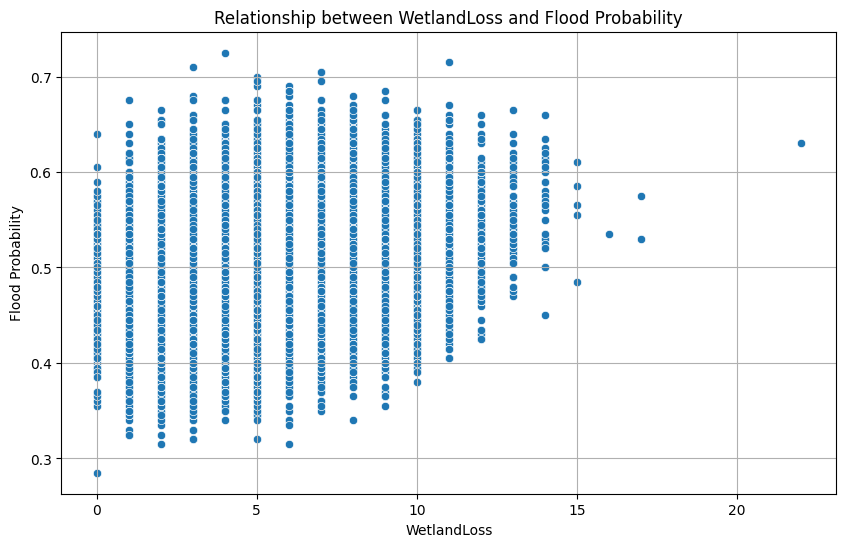

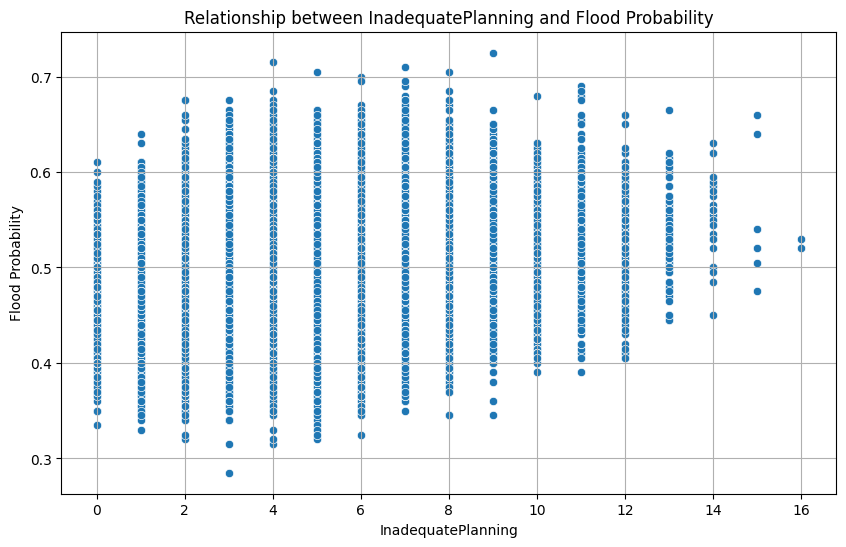

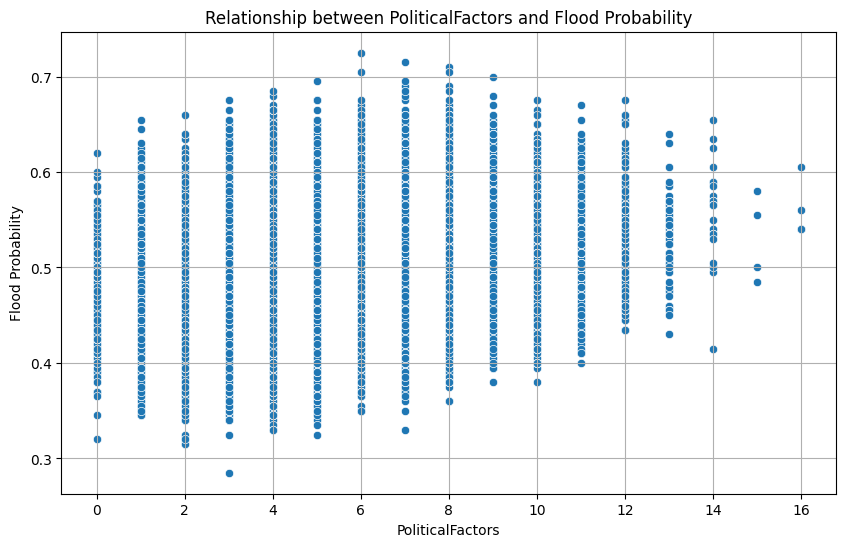


Correlation with Flood Probability (Target Excluded):
 DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
dtype: float64

Correlation with Flood Probability:
 FloodProbab

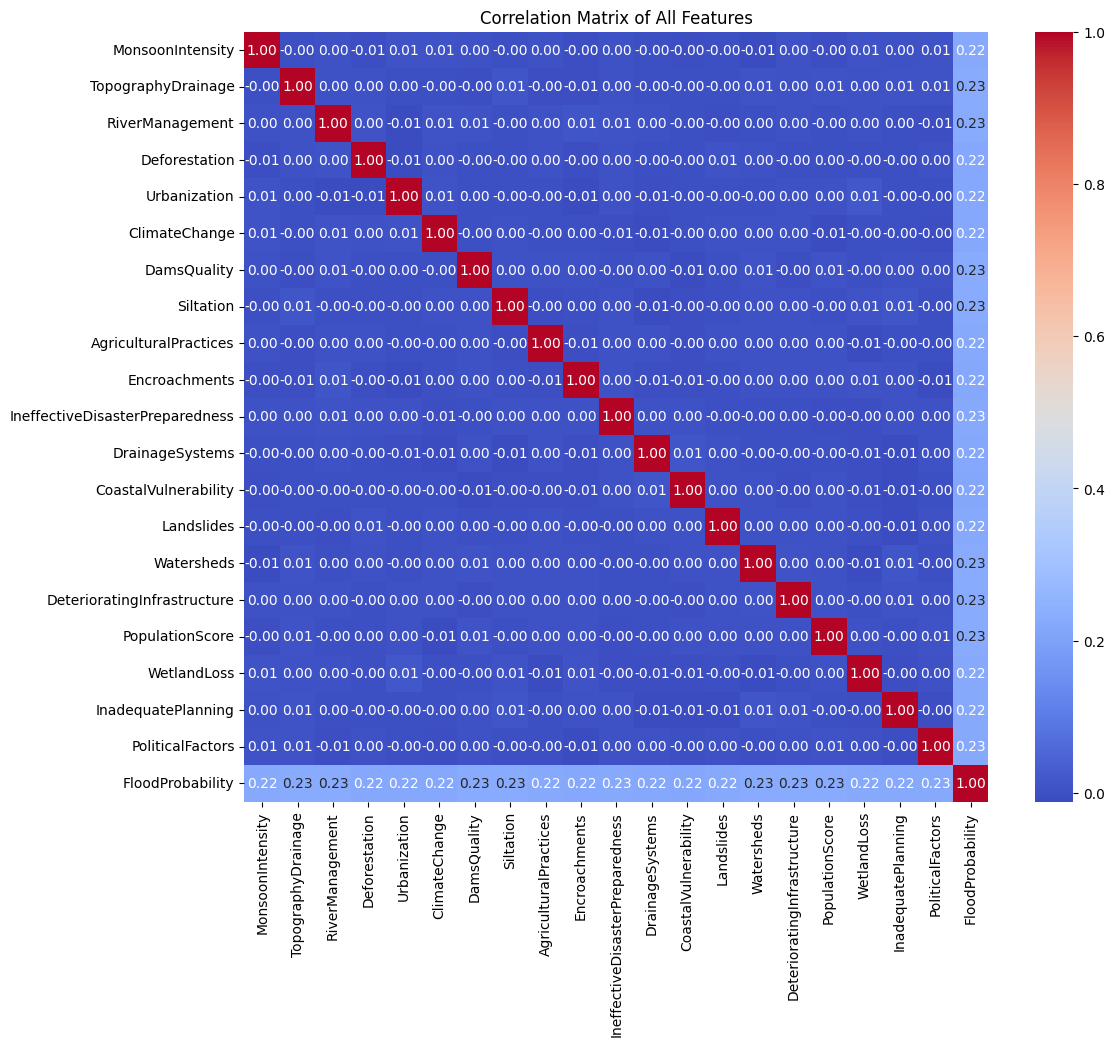

In [14]:
#Correlation analysis
#Visualize the relationship between features and the continuous target 'FloodProbability' ---
for col in df.columns.drop('FloodProbability'): # Iterate through each feature column, excluding the target
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='FloodProbability') # Create a scatter plot to show the relationship
    plt.title(f'Relationship between {col} and Flood Probability') # Set the title of the plot
    plt.xlabel(col) # Label the x-axis with the feature name
    plt.ylabel('Flood Probability') # Label the y-axis as 'Flood Probability'
    plt.grid(True) # Add a grid to the plot for better readability
    plt.show() # Display the plot
    # --- Calculate the correlation of each FEATURE with the target 'FloodProbability' ---
# Select all columns except the target column as features
feature_columns = [col for col in df.columns if col != 'FloodProbability']

# Calculate the correlation between the feature columns and the target column
correlations = df[feature_columns].corrwith(df['FloodProbability']).sort_values(ascending=False)

print("\nCorrelation with Flood Probability (Target Excluded):\n", correlations) # Print the correlation values

# --- Calculate the correlation of each feature with the target 'FloodProbability' ---
correlations = df.corr()['FloodProbability'].sort_values(ascending=False) # Calculate correlations and sort in descending order
print("\nCorrelation with Flood Probability:\n", correlations) # Print the correlation values

# --- Visualize the correlation matrix of all numerical features (including the target) ---
correlation_matrix = df.corr() # Calculate the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Create a heatmap to visualize correlations
plt.title('Correlation Matrix of All Features') # Set the title of the heatmap
plt.show() # Display the heatmap

In [15]:
# Identify highly correlated features (potential multicollinearity)
high_corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            high_corr_pairs.append((col_i, col_j, correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nPotentially problematic highly correlated feature pairs (|r| > 0.5):")
    for col1, col2, corr in high_corr_pairs:
        print(f"{col1} - {col2}: {corr:.3f}")
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.5)")



No highly correlated feature pairs found (threshold: 0.5)


In [19]:
import pandas as pd

# Assuming 'df' is your pandas DataFrame (as loaded in your notebook)
# It already exists at this point in your notebook

# 1. Create the correlation_series
#   -  Select only the input features (all columns EXCEPT 'FloodProbability')
#   -  Calculate the correlation of each input feature with the 'FloodProbability' column
correlation_series = df.drop(columns=['FloodProbability']).corrwith(df['FloodProbability'])

print(correlation_series)  # It's always good to print it out to see what you've created

MonsoonIntensity                   0.224081
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Deforestation                      0.220237
Urbanization                       0.220867
ClimateChange                      0.220986
DamsQuality                        0.227467
Siltation                          0.226544
AgriculturalPractices              0.221846
Encroachments                      0.218259
IneffectiveDisasterPreparedness    0.225126
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Landslides                         0.222991
Watersheds                         0.228152
DeterioratingInfrastructure        0.229444
PopulationScore                    0.226928
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
PoliticalFactors                   0.225009
dtype: float64


3. ADVANCED DATA PREPROCESSING

# 3.1 Outlier Detection and Handling

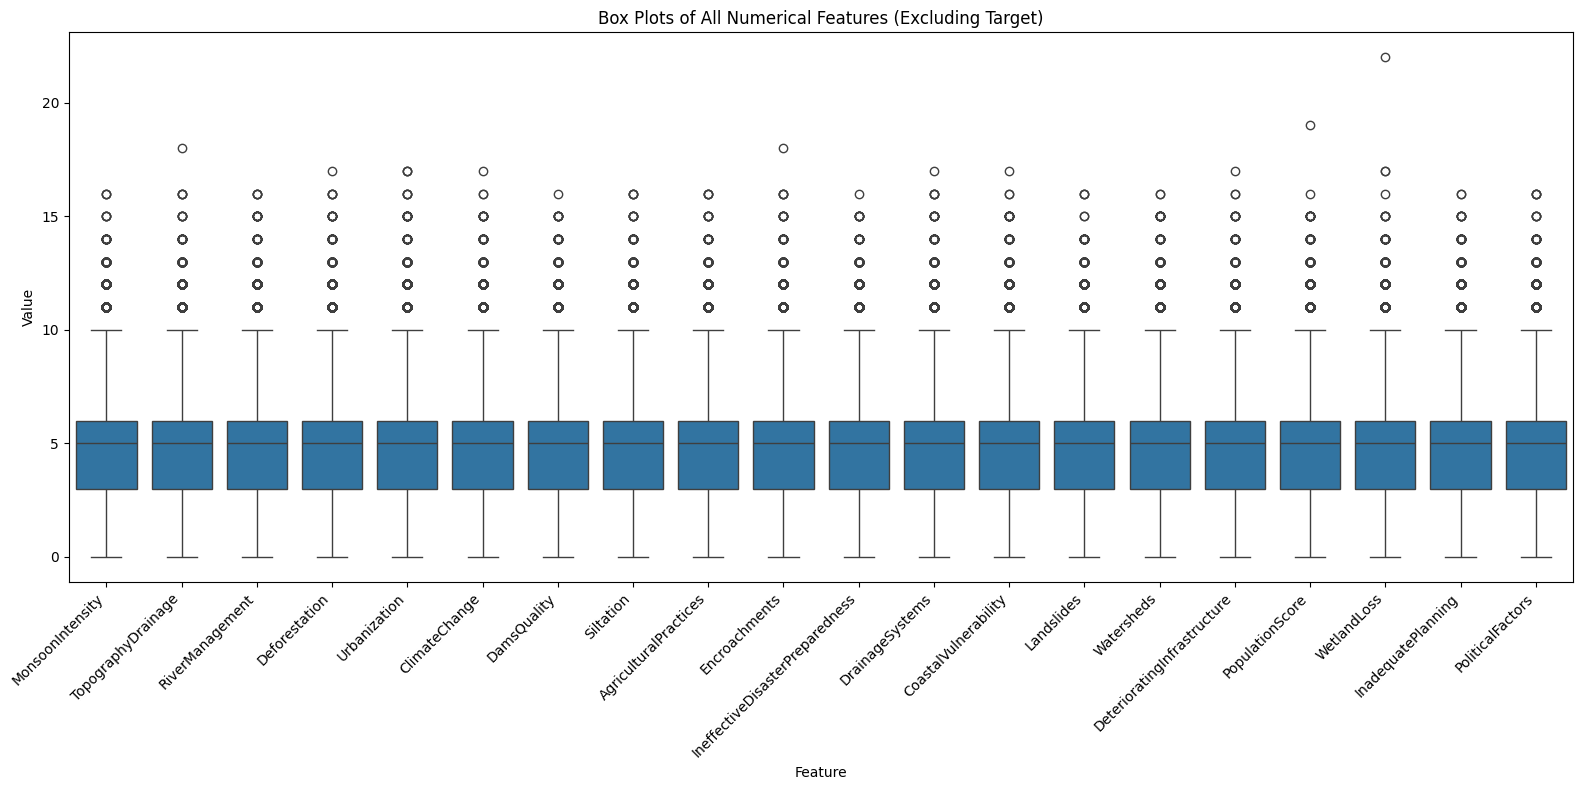

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

target_column = 'FloodProbability'  

numerical_cols_without_target = [col for col in df.select_dtypes(include=np.number).columns if col != target_column]

# Melt the DataFrame to long format for combined box plot visualization  to identify potential outliers, and understand their central tendency and spread
df_melted = pd.melt(df[numerical_cols_without_target], var_name='Feature', value_name='Value')

plt.figure(figsize=(16, 8))  # Adjust figure size as needed
sn.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Box Plots of All Numerical Features (Excluding Target)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Original DataFrame shape: (50000, 21)
DataFrame shape after outlier removal: (37893, 21)


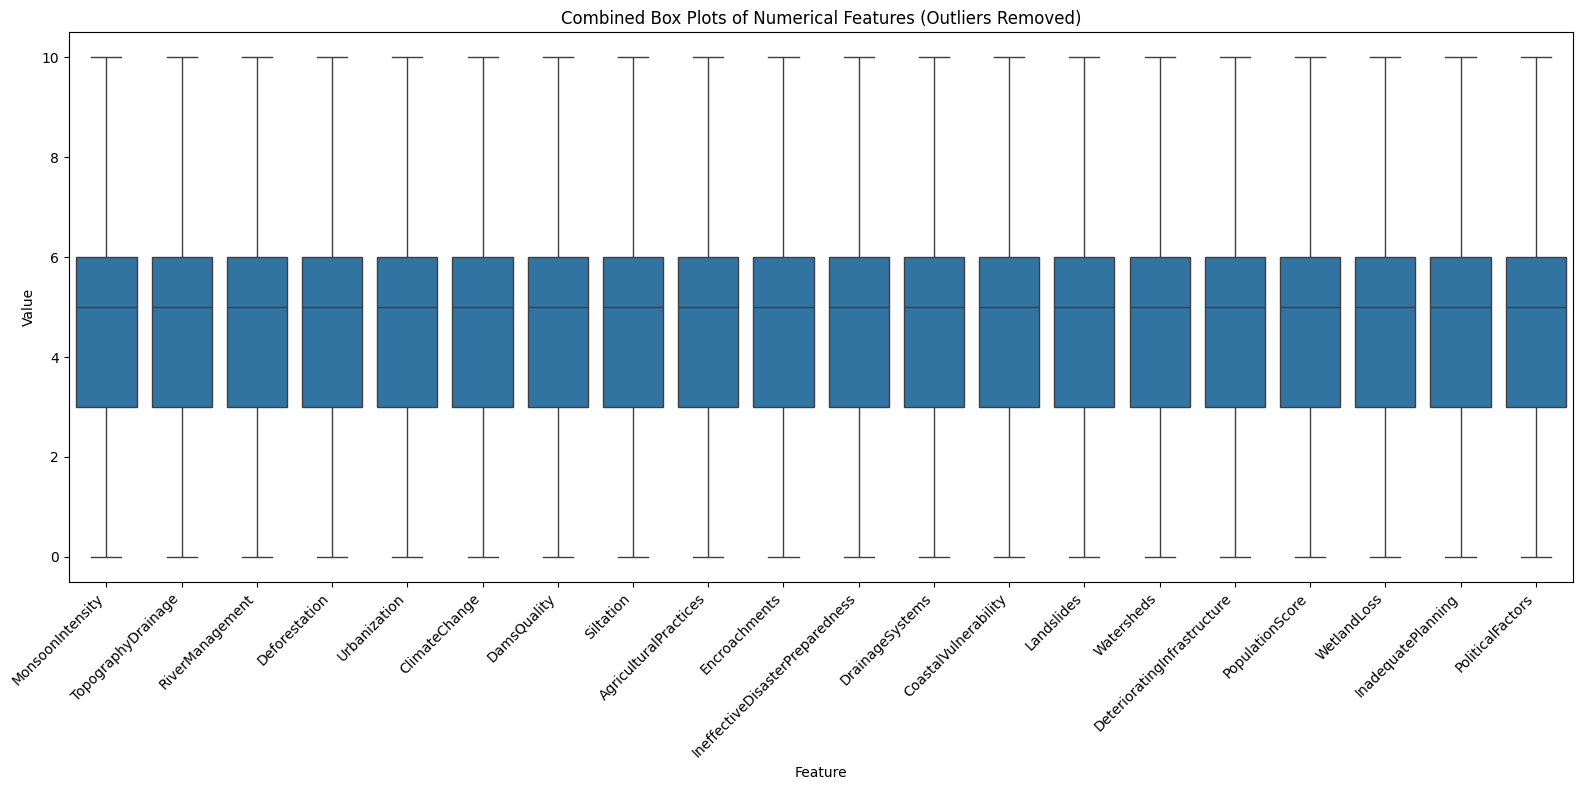

In [17]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column based on the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Assuming 'df' is your DataFrame and 'FloodProbability' is your target column
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
target_column = 'FloodProbability'

numerical_cols_to_clean = [col for col in numerical_cols if col != target_column]

df_cleaned = df.copy()

for col in numerical_cols_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_cleaned.shape}")

# --- Generate a combined box plot of the cleaned data ---
df_melted_cleaned = pd.melt(df_cleaned[numerical_cols_to_clean], var_name='Feature', value_name='Value')

plt.figure(figsize=(16, 8))
sn.boxplot(x='Feature', y='Value', data=df_melted_cleaned)
plt.title('Combined Box Plots of Numerical Features (Outliers Removed)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


3.2 Feature Engineering

In [20]:
def create_interaction_features(df, correlation_series, top_n=10):
    """
    Creates new interaction features by multiplying columns based on their correlation 
    with the target variable.

    Args:
        df (pd.DataFrame): The input DataFrame.
        correlation_series (pd.Series): Correlations of features with the target.
        top_n (int): Number of top correlated features to combine.

    Returns:
        pd.DataFrame: The DataFrame with added interaction features.
    """

    new_features = []
    top_correlated_features = correlation_series.nlargest(top_n).index.tolist()

    for i in range(len(top_correlated_features)):
        for j in range(i + 1, len(top_correlated_features)):
            col1 = top_correlated_features[i]
            col2 = top_correlated_features[j]
            new_col_name = f'{col1}_x_{col2}'
            df[new_col_name] = df[col1] * df[col2]
            new_features.append(new_col_name)
    return df, new_features

df_featured, interaction_cols = create_interaction_features(df.copy(), correlation_series)

print("New Interaction Features Created:")
print(interaction_cols)
print("\nDataFrame with new features shape:", df_featured.shape)
print(df_featured.head())

New Interaction Features Created:
['DeterioratingInfrastructure_x_TopographyDrainage', 'DeterioratingInfrastructure_x_RiverManagement', 'DeterioratingInfrastructure_x_Watersheds', 'DeterioratingInfrastructure_x_DamsQuality', 'DeterioratingInfrastructure_x_PopulationScore', 'DeterioratingInfrastructure_x_Siltation', 'DeterioratingInfrastructure_x_IneffectiveDisasterPreparedness', 'DeterioratingInfrastructure_x_PoliticalFactors', 'DeterioratingInfrastructure_x_MonsoonIntensity', 'TopographyDrainage_x_RiverManagement', 'TopographyDrainage_x_Watersheds', 'TopographyDrainage_x_DamsQuality', 'TopographyDrainage_x_PopulationScore', 'TopographyDrainage_x_Siltation', 'TopographyDrainage_x_IneffectiveDisasterPreparedness', 'TopographyDrainage_x_PoliticalFactors', 'TopographyDrainage_x_MonsoonIntensity', 'RiverManagement_x_Watersheds', 'RiverManagement_x_DamsQuality', 'RiverManagement_x_PopulationScore', 'RiverManagement_x_Siltation', 'RiverManagement_x_IneffectiveDisasterPreparedness', 'RiverMan


Correlation of New Features with Target:
DeterioratingInfrastructure_x_TopographyDrainage                 0.306951
DeterioratingInfrastructure_x_RiverManagement                    0.311148
DeterioratingInfrastructure_x_Watersheds                         0.307954
DeterioratingInfrastructure_x_DamsQuality                        0.310709
DeterioratingInfrastructure_x_PopulationScore                    0.307448
DeterioratingInfrastructure_x_Siltation                          0.307172
DeterioratingInfrastructure_x_IneffectiveDisasterPreparedness    0.305936
DeterioratingInfrastructure_x_PoliticalFactors                   0.307277
DeterioratingInfrastructure_x_MonsoonIntensity                   0.307156
TopographyDrainage_x_RiverManagement                             0.308493
TopographyDrainage_x_Watersheds                                  0.307236
TopographyDrainage_x_DamsQuality                                 0.307984
TopographyDrainage_x_PopulationScore                             0.307

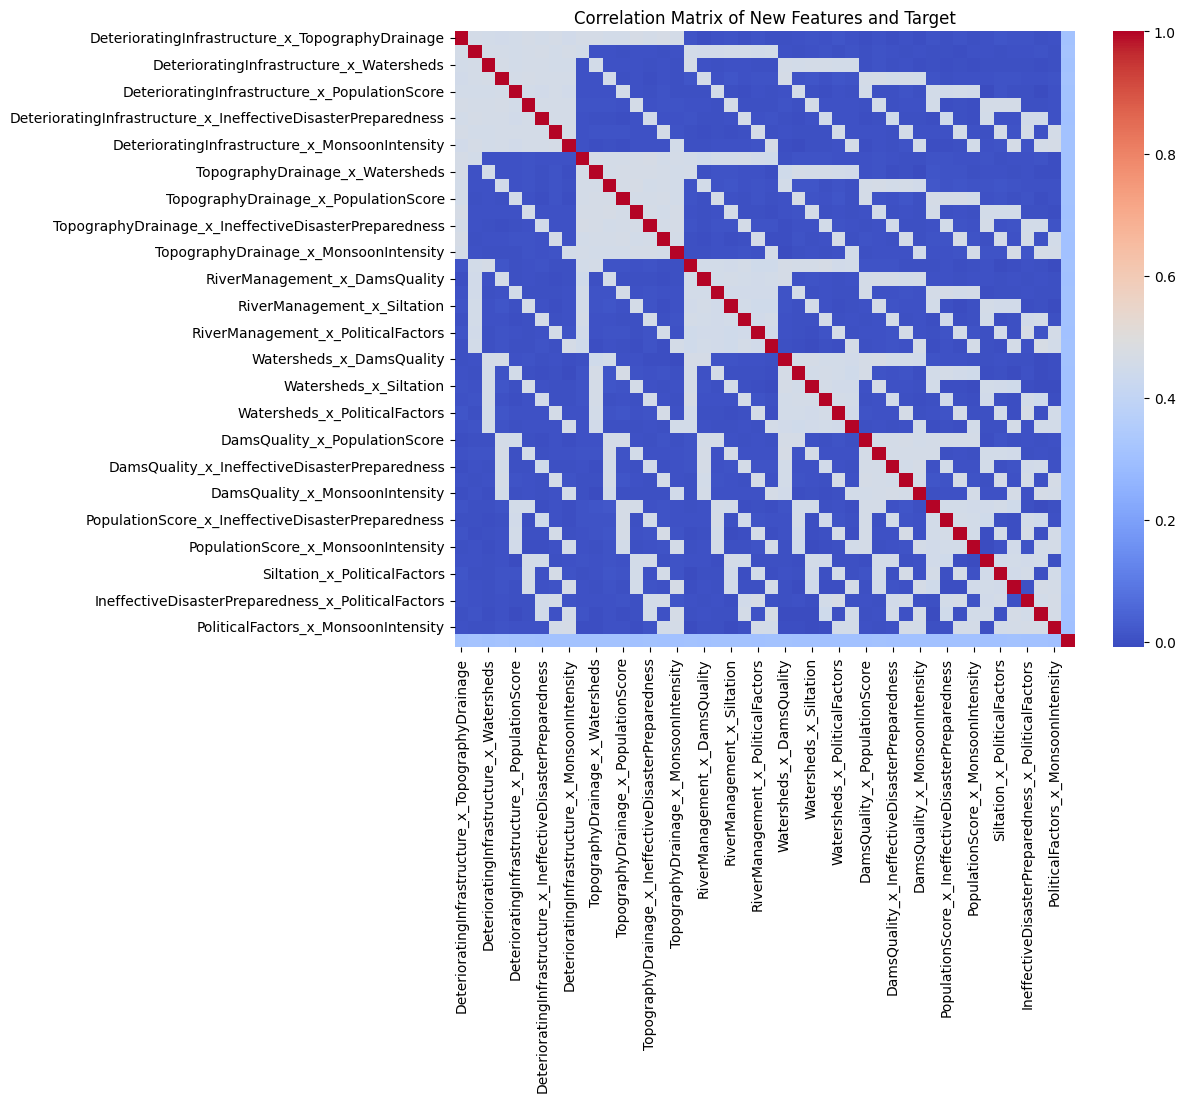

In [22]:
# Check correlation of new features with target
new_feature_correlation = df_featured[interaction_cols].corrwith(df_featured['FloodProbability'])

print("\nCorrelation of New Features with Target:")
print(new_feature_correlation)

# --- (Optional: Visualize the correlations) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df_featured[interaction_cols + ['FloodProbability']].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of New Features and Target")
plt.show()


Domain-Specific Interaction Features Created:
['MonsoonIntensity_x_DrainageSystems', 'Urbanization_x_Deforestation', 'RiverManagement_x_Siltation', 'DeterioratingInfrastructure_x_IneffectiveDisasterPreparedness']

DataFrame shape: (50000, 68)
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7        

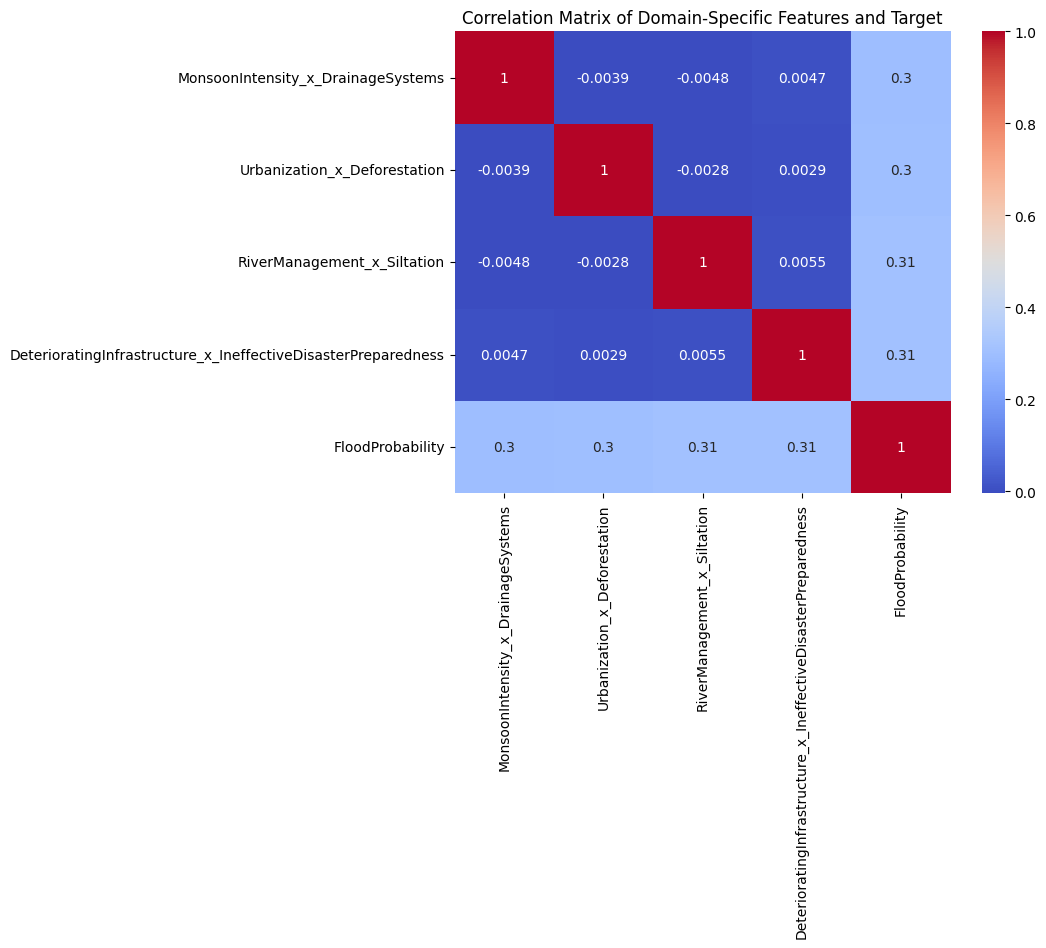

In [ ]:
import pandas as pd
import numpy as np

# --- (Existing code to load data and create initial correlation_series) ---
df = pd.read_csv("flood.csv")  
correlation_series = df.drop(columns=['FloodProbability']).corrwith(df['FloodProbability'])


def create_interaction_features(df, correlation_series, top_n=10):
    # (Your original code - keep this as it's useful too)
    new_features = []
    top_correlated_features = correlation_series.nlargest(top_n).index.tolist()

    for i in range(len(top_correlated_features)):
        for j in range(i + 1, len(top_correlated_features)):
            col1 = top_correlated_features[i]
            col2 = top_correlated_features[j]
            new_col_name = f'{col1}_x_{col2}'
            df[new_col_name] = df[col1] * df[col2]
            new_features.append(new_col_name)
    return df, new_features


df_featured, interaction_cols = create_interaction_features(df.copy(), correlation_series)


# --- Domain-Specific Interaction Features ---

def create_domain_interactions(df):
    """
    Creates interaction features based on domain knowledge about flood risks.
    """
    df['MonsoonIntensity_x_DrainageSystems'] = df['MonsoonIntensity'] * df['DrainageSystems']
    df['Urbanization_x_Deforestation'] = df['Urbanization'] * df['Deforestation']
    df['RiverManagement_x_Siltation'] = df['RiverManagement'] * df['Siltation']
    df['DeterioratingInfrastructure_x_IneffectiveDisasterPreparedness'] = (
        df['DeterioratingInfrastructure'] * df['IneffectiveDisasterPreparedness']
    )

    domain_interaction_cols = [
        'MonsoonIntensity_x_DrainageSystems',
        'Urbanization_x_Deforestation',
        'RiverManagement_x_Siltation',
        'DeterioratingInfrastructure_x_IneffectiveDisasterPreparedness',
    ]
    return df, domain_interaction_cols


df_featured, domain_cols = create_domain_interactions(df_featured)  # Use the already featured df

print("\nDomain-Specific Interaction Features Created:")
print(domain_cols)
print("\nDataFrame shape:", df_featured.shape)
print(df_featured.head())

# --- (Code to check correlations - as before) ---
new_feature_correlation = df_featured[domain_cols].corrwith(df_featured['FloodProbability'])
print("\nCorrelation of Domain-Specific Features with Target:")
print(new_feature_correlation)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df_featured[domain_cols + ['FloodProbability']].corr(), annot=True, cmap='coolwarm')  # Annotate for clarity
plt.title("Correlation Matrix of Domain-Specific Features and Target")
plt.show()

3.3 Feature Selection / Dimensionality Reduction

In [ ]:
def remove_high_correlation(df, threshold=0.8, target_col=None):
    """
    Remove highly correlated features, keeping the one more correlated with the target
    (if target_col is provided).

    Args:
        df (pd.DataFrame): Input DataFrame.
        threshold (float): Correlation threshold above which to remove features.
        target_col (str, optional): Name of the target column. Defaults to None.

    Returns:
        list: List of columns to drop.
    """
    df_corr = df.corr().abs()
    upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

    to_drop = []
    for i, j in zip(*np.where(upper > threshold)):
        col_i, col_j = df_corr.columns[i], df_corr.columns[j]

        # Skip if target column or already marked for dropping
        if (target_col and (col_i == target_col or col_j == target_col)) or \
           col_i in to_drop or col_j in to_drop:
            continue

        # If there's a target, keep the feature more correlated with target
        if target_col:
            if abs(df_corr.loc[col_i, target_col]) >= abs(df_corr.loc[col_j, target_col]):
                to_drop.append(col_j)
            else:
                to_drop.append(col_i)
        else:
            # No target, simply drop the second column
            to_drop.append(col_j)

    return to_drop

# --- Example Usage ---
# Assuming 'df_featured' is your DataFrame after feature engineering
target_column = 'FloodProbability'  # Replace with your actual target column name
df_clean = df_featured.copy() # Create a copy to avoid modifying original

high_corr_features = remove_high_correlation(df_clean, threshold=0.8, target_col=target_column)

if high_corr_features:
    print(f"Features to drop due to high correlation: {high_corr_features}")
    df_clean = df_clean.drop(columns=high_corr_features)

print("\nDataFrame shape after removing highly correlated features:", df_clean.shape)
print(df_clean.head())



DataFrame shape after removing highly correlated features: (50000, 68)
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                  

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def load_data(csv_path="flood.csv"):
    """Loads the dataset from a CSV file."""
    try:
        df = pd.read_csv(csv_path)
        print(f"Data loaded successfully from {csv_path}. Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {csv_path}")
        return None  # Or raise the exception, depending on your error handling strategy

def perform_feature_engineering(df):
    """
    Creates interaction features (replace with your actual engineering).

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with new features.
    """
    df_featured = df.copy()
    for col in df.columns[:-1]:  # Exclude target column
        if df[col].dtype == 'int64':
            df_featured[f'{col}_x_PopulationScore'] = df[col] * df['PopulationScore']
    print("Feature engineering complete.")
    return df_featured

def remove_high_correlation(df, threshold=0.8, target_col=None):
    """
    Removes highly correlated features.

    Args:
        df (pd.DataFrame): Input DataFrame.
        threshold (float): Correlation threshold.
        target_col (str, optional): Target column name.

    Returns:
        pd.DataFrame: DataFrame with correlated features removed.
        list: List of dropped columns.
    """
    df_clean = df.copy()  # Operate on a copy
    df_corr = df_clean.drop(columns=[target_col], errors='ignore').corr().abs()
    upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

    if to_drop:
        print(f"Dropping highly correlated features (threshold={threshold}): {to_drop}")
        df_clean = df_clean.drop(columns=to_drop, errors='ignore')  # Use errors='ignore'
    else:
        print("No features dropped due to high correlation.")

    return df_clean, to_drop

def calculate_vif(df):
    """
    Calculates Variance Inflation Factors.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with VIF values.
    """
    try:
        df_vif = df.copy()
        df_vif = add_constant(df_vif, has_constant='add')
        vif_data = pd.DataFrame()
        vif_data["feature"] = df_vif.columns
        df_vif = df_vif.dropna(axis=1, how='any')  # Drop columns with NaN
        vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                           for i in range(df_vif.shape[1])]
        return vif_data.dropna()
    except Exception as e:
        print(f"Error calculating VIF: {e}")
        return pd.DataFrame()

def main():
    """
    Main function to orchestrate the data processing.
    """
    df = load_data("flood.csv")  # Load the data
    if df is None:
        return  # Stop if data loading failed

    df_featured = perform_feature_engineering(df)

    target_column = 'FloodProbability'  # ***IMPORTANT
    df_clean, dropped_columns = remove_high_correlation(
        df_featured, threshold=0.6, target_col=target_column
    )

    if not df_clean.empty:
        df_for_vif = df_clean.drop(columns=[target_column], errors='ignore')
        vif_result = calculate_vif(df_for_vif)

        if not vif_result.empty:
            print("\nVariance Inflation Factors:\n", vif_result)
        else:
            print("\nVIF calculation was not performed or failed.")
    else:
        print("Cannot calculate VIFs because the DataFrame is empty.")


if __name__ == "__main__":
    main()

Data loaded successfully from flood.csv. Shape: (50000, 21)
Feature engineering complete.
Dropping highly correlated features (threshold=0.6): ['MonsoonIntensity_x_PopulationScore', 'TopographyDrainage_x_PopulationScore', 'RiverManagement_x_PopulationScore', 'Deforestation_x_PopulationScore', 'Urbanization_x_PopulationScore', 'ClimateChange_x_PopulationScore', 'DamsQuality_x_PopulationScore', 'Siltation_x_PopulationScore', 'AgriculturalPractices_x_PopulationScore', 'Encroachments_x_PopulationScore', 'IneffectiveDisasterPreparedness_x_PopulationScore', 'DrainageSystems_x_PopulationScore', 'CoastalVulnerability_x_PopulationScore', 'Landslides_x_PopulationScore', 'Watersheds_x_PopulationScore', 'DeterioratingInfrastructure_x_PopulationScore', 'PopulationScore_x_PopulationScore', 'WetlandLoss_x_PopulationScore', 'InadequatePlanning_x_PopulationScore', 'PoliticalFactors_x_PopulationScore']

Variance Inflation Factors:
                             feature         VIF
0                       

4. MODEL PREPARATION

In [14]:
# Load and preprocess your data (assuming 'df' is your initial DataFrame)
# ... (your data loading and preprocessing code)

target_column = 'FloodProbability'  # Ensure target_column is defined
df_clean, dropped_columns = remove_high_correlation(df.copy(), threshold=0.6, target_col=target_column)

# Now df_clean is defined in this scope
X = df_clean.drop(target_column, axis=1)
y = df_clean[target_column]

# Use X and y for further processing

No features dropped due to high correlation.


In [17]:
# Split data into training and testing sets (stratified if classification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 40000 samples
Testing set: 10000 samples


In [18]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


5. MODEL DEVELOPMENT WITH HYPERPARAMETER TUNING

5.1 Define models with hyperparameter grids

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Define the models dictionary
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}  # Linear Regression has no major hyperparameters to tune
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }
}
# Initialize best_models and results dictionaries
cv = KFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}  # Initialize best_models here
results = {}


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  # Import Linear Regression

# --1: Linear Regression ---

name = 'Linear Regression'
model_info = models['Linear Regression']  # Access by the model's name (string)


print(f"\nTraining and tuning {name}...")

# Linear Regression has no hyperparameters to tune in this code
model = model_info['model']
model.fit(X_train_scaled, y_train)
best_models[name] = model

# Evaluate with cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train,
                            cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_scores = -cv_scores

print(f"Cross-validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")

# Test predictions
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

results[name] = {
    'cv_rmse_mean': rmse_scores.mean(),
    'cv_rmse_std': rmse_scores.std(),
    'test_rmse': rmse,
    'test_r2': r2,
    'test_predictions': y_pred
}

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Training and tuning Linear Regression...
Cross-validation RMSE: 0.0000 ± 0.0000
Test RMSE: 0.0000
Test R²: 1.0000


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest
from scipy.stats import randint  # For integer parameter distributions

# --- 2: Random Forest Regressor ---

name = 'Random Forest'
model_info = models[name]

print(f"\nTraining and tuning {name}...")

# RandomizedSearchCV for Random Forest
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 2)
}

random_search = RandomizedSearchCV(
    estimator=model_info['model'],
    param_distributions=param_dist,
    n_iter=20,  # Number of iterations
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0,
    random_state=42  # Added random_state
)

random_search.fit(X_train_scaled, y_train)
best_models[name] = random_search.best_estimator_

# Evaluate with cross-validation (using best estimator)
cv_scores = cross_val_score(best_models[name], X_train_scaled, y_train,
                            cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_scores = -cv_scores

# Test predictions (using best estimator)
y_pred = best_models[name].predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

results[name] = {
    'cv_rmse_mean': rmse_scores.mean(),
    'cv_rmse_std': rmse_scores.std(),
    'test_rmse': rmse,
    'test_r2': r2,
    'best_params': random_search.best_params_,
    'test_predictions': y_pred
}

print(f"Best parameters: {random_search.best_params_}")
print(f"Cross-validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Training and tuning Random Forest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 132}
Cross-validation RMSE: 0.0263 ± 0.0002
Test RMSE: 0.0258
Test R²: 0.7319


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor  # Import Gradient Boosting

# --3: Gradient Boosting Regressor ---

name = 'Gradient Boosting'
model_info = models[name]

print(f"\nTraining and tuning {name}...")

# GridSearchCV for Gradient Boosting (if it has params)
grid_search = GridSearchCV(
    estimator=model_info['model'],
    param_grid=model_info['params'],  # Ensure params are defined in 'models'
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)
best_models[name] = grid_search.best_estimator_

# Evaluate with cross-validation (using best estimator)
cv_scores = cross_val_score(best_models[name], X_train_scaled, y_train,
                            cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_scores = -cv_scores

# Test predictions (using best estimator)
y_pred = best_models[name].predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

results[name] = {
    'cv_rmse_mean': rmse_scores.mean(),
    'cv_rmse_std': rmse_scores.std(),
    'test_rmse': rmse,
    'test_r2': r2,
    'best_params': grid_search.best_params_,
    'test_predictions': y_pred
}

print(f"Best parameters: {grid_search.best_params_}")
print(f"Cross-validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Training and tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Cross-validation RMSE: 0.0173 ± 0.0001
Test RMSE: 0.0171
Test R²: 0.8826


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb  # Import XGBoost

# - 4: XGBoost Regressor ---

name = 'XGBoost'
model_info = models[name]

print(f"\nTraining and tuning {name}...")

# GridSearchCV for XGBoost (if it has params)
grid_search = GridSearchCV(
    estimator=model_info['model'],
    param_grid=model_info['params'],
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)
best_models[name] = grid_search.best_estimator_

# Evaluate with cross-validation (using best estimator)
cv_scores = cross_val_score(best_models[name], X_train_scaled, y_train,
                            cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_scores = -cv_scores

# Test predictions (using best estimator)
y_pred = best_models[name].predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

results[name] = {
    'cv_rmse_mean': rmse_scores.mean(),
    'cv_rmse_std': rmse_scores.std(),
    'test_rmse': rmse,
    'test_r2': r2,
    'best_params': grid_search.best_params_,
    'test_predictions': y_pred
}

print(f"Best parameters: {grid_search.best_params_}")
print(f"Cross-validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Training and tuning XGBoost...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Cross-validation RMSE: 0.0172 ± 0.0002
Test RMSE: 0.0170
Test R²: 0.8839


6. MODEL EVALUATION AND COMPARISON

In [28]:
# 6.1 Comparison table
comparison_data = {
    'Model': [],
    'CV RMSE (mean)': [],
    'CV RMSE (std)': [],
    'Test RMSE': [],
    'Test R²': []
}

for name, result in results.items():
    comparison_data['Model'].append(name)
    comparison_data['CV RMSE (mean)'].append(result['cv_rmse_mean'])
    comparison_data['CV RMSE (std)'].append(result.get('cv_rmse_std', 0))
    comparison_data['Test RMSE'].append(result['test_rmse'])
    comparison_data['Test R²'].append(result['test_r2'])

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test RMSE')  # Sort by test RMSE

print("Model Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
               Model  CV RMSE (mean)  CV RMSE (std)     Test RMSE   Test R²
0  Linear Regression    3.363313e-16   1.789565e-16  3.672469e-16  1.000000
3            XGBoost    1.718284e-02   1.616540e-04  1.700556e-02  0.883887
2  Gradient Boosting    1.730157e-02   6.435631e-05  1.709992e-02  0.882595
1      Random Forest    2.633397e-02   1.972400e-04  2.584246e-02  0.731857


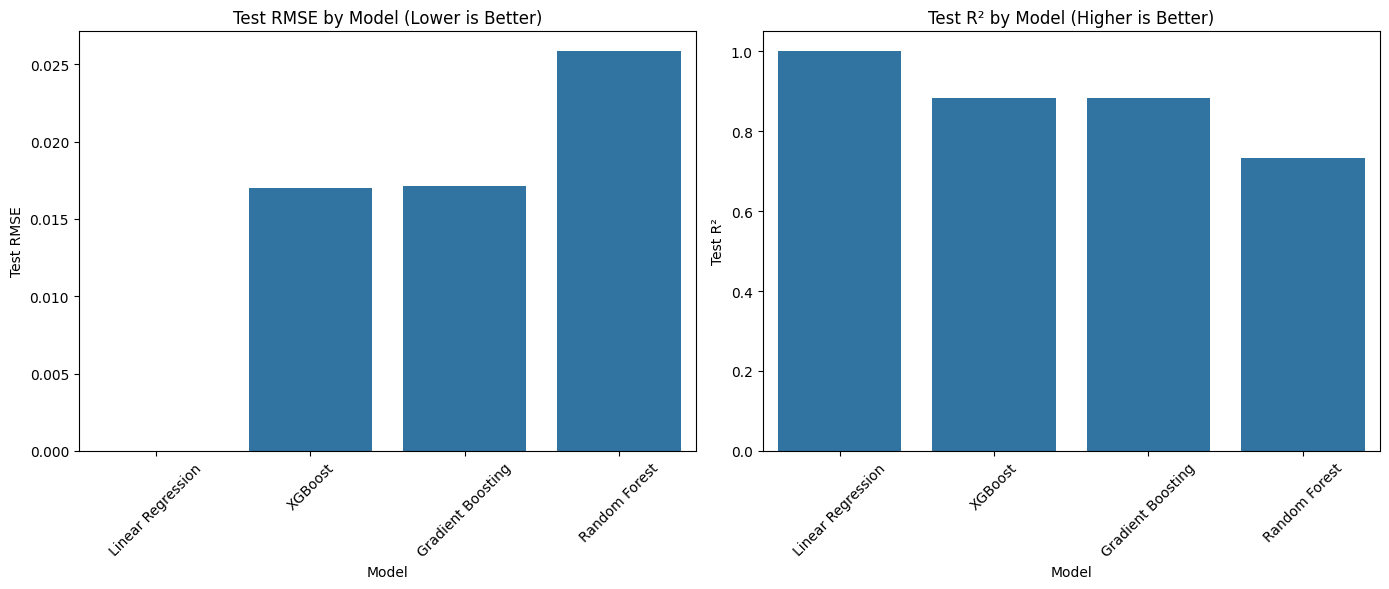

In [29]:
# 6.2 Visualize model comparison
plt.figure(figsize=(14, 6))

# RMSE comparison (lower is better)
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Test RMSE', data=comparison_df)
plt.title('Test RMSE by Model (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()

# R² comparison (higher is better)
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Test R²', data=comparison_df)
plt.title('Test R² by Model (Higher is Better)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [30]:
# 6.3 Find best performing model
best_model_name = comparison_df.iloc[0]['Model']
best_model = best_models[best_model_name]
print(f"\nBest performing model: {best_model_name}")



Best performing model: Linear Regression


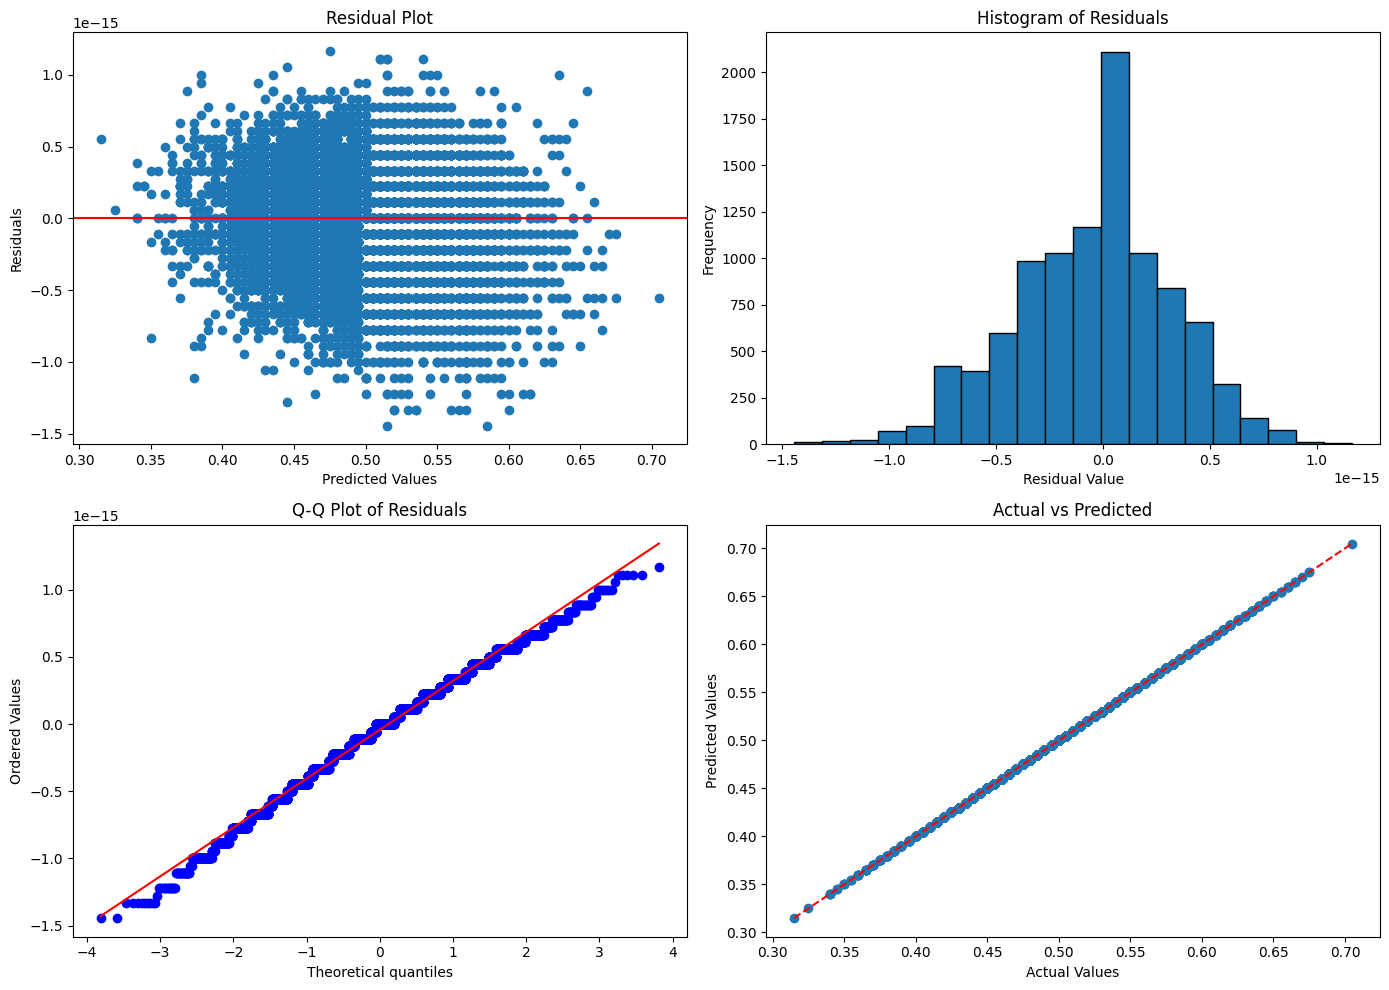

In [31]:
# 6.4 Residual analysis for best model
best_predictions = results[best_model_name]['test_predictions']
residuals = y_test - best_predictions

plt.figure(figsize=(14, 10))

# Residual plot
plt.subplot(2, 2, 1)
plt.scatter(best_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(2, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

# Q-Q plot of residuals
plt.subplot(2, 2, 3)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Actual vs Predicted
plt.subplot(2, 2, 4)
plt.scatter(y_test, best_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


7. FEATURE IMPORTANCE ANALYSIS

Feature Coefficients from Best Model:
                            Feature  Coefficient
1                TopographyDrainage     0.011244
19                 PoliticalFactors     0.011243
12             CoastalVulnerability     0.011214
6                       DamsQuality     0.011214
8             AgriculturalPractices     0.011206
16                  PopulationScore     0.011204
11                  DrainageSystems     0.011199
4                      Urbanization     0.011192
0                  MonsoonIntensity     0.011173
7                         Siltation     0.011171
14                       Watersheds     0.011171
18               InadequatePlanning     0.011166
9                     Encroachments     0.011161
5                     ClimateChange     0.011149
15      DeterioratingInfrastructure     0.011148
17                      WetlandLoss     0.011139
13                       Landslides     0.011136
10  IneffectiveDisasterPreparedness     0.011113
3                     Deforesta

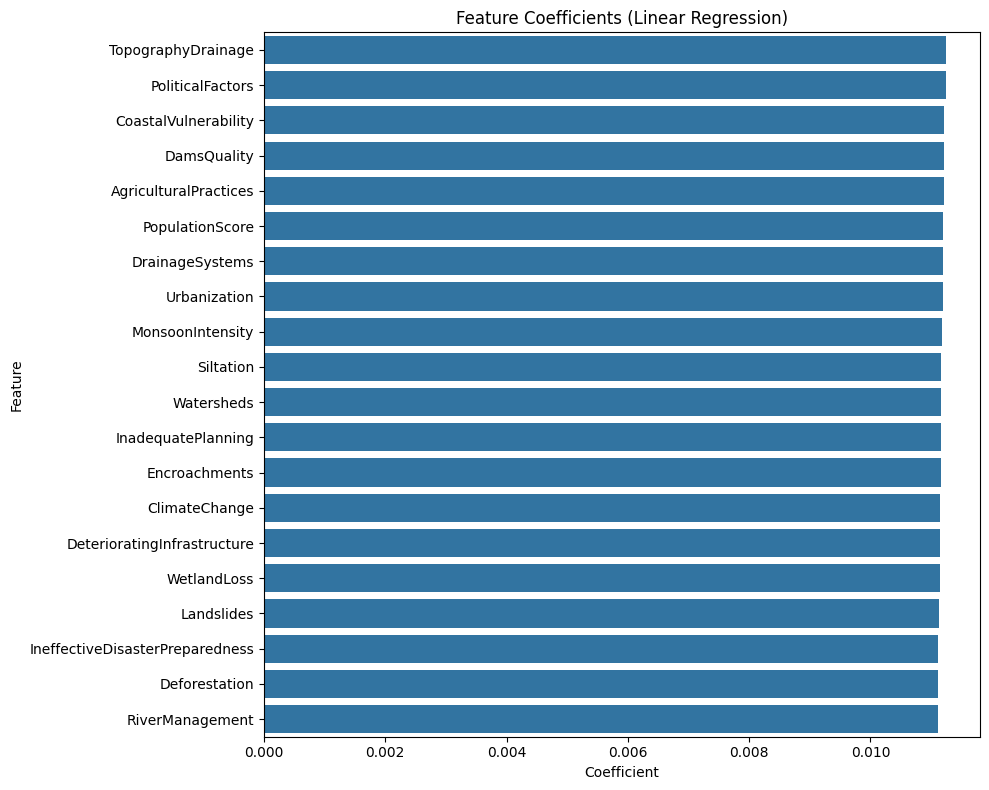

In [32]:
# Extract feature importance if available
if hasattr(best_model, 'feature_importances_'):
    # Tree-based models have feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Feature Importance from Best Model:")
    print(feature_importance)
    
    # Visualize feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance ({best_model_name})')
    plt.tight_layout()
    plt.show()
    
    # SHAP values for deeper understanding
    try:
        print("\nCalculating SHAP values for model interpretation...")
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test)
        
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_test, feature_names=X.columns)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not generate SHAP values: {e}")
elif hasattr(best_model, 'coef_'):
    # Linear models have coef_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_
    }).sort_values('Coefficient', ascending=False)
    
    print("Feature Coefficients from Best Model:")
    print(feature_importance)
    
    # Visualize coefficients
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
    plt.title(f'Feature Coefficients ({best_model_name})')
    plt.tight_layout()
    plt.show()


8. MODEL PERSISTENCE & PREDICTION FUNCTION

In [36]:
import joblib
# Save best model, scaler and feature names
model_filename = f"best_flood_prediction_model_{best_model_name.replace(' ', '_').lower()}.pkl"
scaler_filename = "flood_prediction_scaler.pkl"

# Save the model
joblib.dump(best_model, model_filename)
joblib.dump(scaler, scaler_filename)
joblib.dump(list(X.columns), "flood_prediction_feature_names.pkl")

print(f"Best model saved to {model_filename}")
print(f"Scaler saved to {scaler_filename}")

# Create a prediction function
def predict_flood_probability(input_data, model=best_model, scaler=scaler, feature_names=X.columns):
    """
    Predict flood probability for new data.
    
    Parameters:
    - input_data: DataFrame or dict containing feature values
    - model: Trained model object
    - scaler: Fitted scaler object
    - feature_names: List of feature names in the correct order
    
    Returns:
    - Predicted flood probability
    """
    # Convert input to DataFrame if it's a dict
    if isinstance(input_data, dict):
        input_data = pd.DataFrame([input_data])
    
    # Ensure all features are present
    for feature in feature_names:
        if feature not in input_data.columns:
            raise ValueError(f"Missing feature: {feature}")
    
    # Reorder columns to match training data
    input_data = input_data[feature_names]
    
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_scaled)
    
    return prediction[0]

# Example usage
print("\nExample prediction function usage:")
print("predict_flood_probability({feature1: value1, feature2: value2, ...})")


Best model saved to best_flood_prediction_model_linear_regression.pkl
Scaler saved to flood_prediction_scaler.pkl

Example prediction function usage:
predict_flood_probability({feature1: value1, feature2: value2, ...})


9. CONCLUSIONS AND RECOMMENDATIONS

In [34]:
print(f"1. Best performing model: {best_model_name}")
print(f"   - Test RMSE: {comparison_df.iloc[0]['Test RMSE']:.4f}")
print(f"   - Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")

# Most important features (if available)
if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
    top_features = feature_importance.head(5)
    print("\n2. Most important features:")
    for i, (feature, importance) in enumerate(zip(top_features.iloc[:, 0], top_features.iloc[:, 1])):
        print(f"   {i+1}. {feature}: {importance:.4f}")

print("\n3. Model deployment recommendations:")
print("   - Use the predict_flood_probability() function for new data")
print("   - Consider retraining the model periodically with new data")
print("   - Monitor model performance over time")

print("\n4. Further improvements to explore:")
print("   - Collect more data if possible")
print("   - Try deep learning approaches (LSTM, etc.) for time-series aspects")
print("   - Incorporate external data sources (weather forecasts, satellite imagery)")
print("   - Develop ensemble methods combining multiple models")


1. Best performing model: Linear Regression
   - Test RMSE: 0.0000
   - Test R²: 1.0000

2. Most important features:
   1. TopographyDrainage: 0.0112
   2. PoliticalFactors: 0.0112
   3. CoastalVulnerability: 0.0112
   4. DamsQuality: 0.0112
   5. AgriculturalPractices: 0.0112

3. Model deployment recommendations:
   - Use the predict_flood_probability() function for new data
   - Consider retraining the model periodically with new data
   - Monitor model performance over time

4. Further improvements to explore:
   - Collect more data if possible
   - Try deep learning approaches (LSTM, etc.) for time-series aspects
   - Incorporate external data sources (weather forecasts, satellite imagery)
   - Develop ensemble methods combining multiple models
